# **2021-2학기 기말과제**

# **문제**
IMDb를 이용한 sentiment analysis 문제를 해결하시오.

* 데이터셋: IMDb  
https://keras.io/api/datasets/imdb/  
IMDb testset 외에 직접 만든 임의의 test data 10건에 대한 결과 확인 필수  
Reference 코드 활용: 교재, 인터넷 등에서 발견한 코드를 1개 이상 참고하여 이를 수정해서 실험 가능(원본 소스코드의 출처 명시 필수)  
교재 16.2
https://wikidocs.net/24586
그 외 다른 소스 참고 가능

* 신경망 구조에 대해서는 제한이 없음  
CNN, RNN, Attention 모두 사용 가능  
Pretrained model도 사용 가능

* 제출 형식: 소스코드 및 보고서  
소스코드는 ipynb 형식으로 제출  
보고서는 일반 문서 혹은 ipynb 형식 중 원하는 형태로 제출

* 과제 평가 기준  
최종 성능: dataset에 정의된 test set에 대한 분류 정확도(accuary) 상대평가  
성실도: 다양한 모델 구조 혹은 훈련 설정에 대해 비교 실험을 수행했는지 평가  
보고서: 원본 소스에 대한 분석, 실험을 설계한 동기, 실험 결과에 대한 분석 등의 타당성

# **데이터 분석**

### **필요한 모듈 임포트**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

In [2]:
# 영화 리뷰 데이터 로드
(X_train, y_train), (X_test, y_test) = imdb.load_data()

# 이미 훈련 데이터와 테스트 데이터를 50:50 비율로 구분해서 제공함
print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))

17473536/17464789 [==============================] - 0s 0us/step
훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


In [3]:
# 훈련 데이터 구성 확인
print('첫번째 훈련용 리뷰 :',X_train[0])
print('첫번째 훈련용 리뷰의 레이블 :',y_train[0])

첫번째 훈련용 리뷰 : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
첫번째 훈련용 리뷰의 레이블 : 1


이 문제에서는 0또는 1의 값을 훈련용 리뷰의 레이블로 갖는데 긍정은 1의 값을 가진다.  
따라서 첫번째 리뷰는 긍정이다.

IMDB 리뷰 데이터는 전체 데이터에서 각 단어들의 등장 빈도에 따라서 인덱스를 부여했다. 숫자가 낮을수록 이 데이터에서 등장 빈도 순위가 높다. 위에서 단어 집합의 크기를 제한하지 않았기 때문에 22,665와 같은 큰 숫자도 보인다.

In [4]:
reviews_length = [len(review) for review in X_train]

print('리뷰의 최대 길이 : {}'.format(np.max(reviews_length)))
print('리뷰의 평균 길이 : {}'.format(np.mean(reviews_length)))

리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


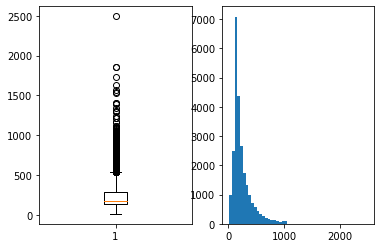

In [5]:
# 리뷰의 길이 분포 시각화
plt.subplot(1,2,1)
plt.boxplot(reviews_length)
plt.subplot(1,2,2)
plt.hist(reviews_length, bins=50)
plt.show()

대체적으로 1000이하의 길이를 가지고 100~500길이를 가진 데이터가 많을 것을 확인할 수 있다.  
가장 긴 길이를 가진 데이터의 길이는 2000이 넘는 것도 확인 할 수 있다.

In [6]:
# 레이블 분포 확인
unique_elements, counts_elements = np.unique(y_train, return_counts=True)

# np.unique()
# 주어진 넘파이 배열의 모든 고유 값을 검색하고 정렬한다.
# return_counts=Ture : 각 고유 값의 개수 배열을 반환한다.

print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[    0     1]
 [12500 12500]]


부정 : 긍정 = 12500 : 12500 = 50: 50

**imdb.get_word_index()**  
각 단어와 맵핑되는 정수가 저장되어 있다.  
주의할 점은 imdb.get_word_index()에 저장된 값에 3을 더해줘야 실제 매핑되는 정수이다.

정수 0, 1, 2는 특별하다. 각각 패딩 토큰, SOS 토큰, 알 수 없는 단어를 의미한다.

In [7]:
# 전처리 전에 어떤 단어였는지 확인
word_to_index = imdb.get_word_index()
index_to_word = {}

# IMDb 리뷰 데이터셋에서는 0~2은 특별 토큰으로 취급하고 있다.
# 3부터 실제 IMDb 리뷰 데이터셋에서 빈도수가 가장 높은 실제 영단어이다.
for key, value in word_to_index.items():
    index_to_word[value+3] = key

1654784/1641221 [==============================] - 0s 0us/step


In [8]:
print('빈도수 상위 1등 단어 : {}'.format(index_to_word[4]))

빈도수 상위 1등 단어 : the


In [9]:
print('빈도수 상위 223등 단어 : {}'.format(index_to_word[226]))

빈도수 상위 223등 단어 : whole


이 데이터에서 빈도가 가장 높은 단어는 the이고, 빈도가 223번째로 높은 단어는 whole이다.

In [10]:
# 첫번째 훈련용 리뷰의 X_train[0]이 인덱스로 바뀌기 전어 어떤 단어들이었는지 확인
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index] = token

print(' '.join([index_to_word[index] for index in X_train[0]]))

<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shoul

# **GRU로 IMDb 리뷰 감성 분류하기**

### **필요한 모듈 임포트**

In [11]:
import re
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [12]:
# 단어 집합의 크기를 10000으로 제한
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)

In [13]:
# 리뷰 최대 길이는 500으로 제한한다.
# 각 리뷰는 문장의 길이가 다르기 때문에, 모델이 처리할 수 있도록 길이를 동일하게 해주어야 한다.

# pad_sequences는 Numpy로 패딩을 진행할 때와 다르게 기본적으로 문서의 뒤에 0을 채우는 것이 아니라 앞에 0으로 채운다.
# 뒤에 0을 채우고 싶다면 인자로 padding='post'를 준다.

max_len = 500
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

### **모델 정의**

In [14]:
# Embedding()은 첫번째 인자로 단어 집합의 크기, 두번째 인자로 임베딩 후의 벡터의 크기를 받는다.
# 입력 데이터의 모든 단어는 100차원의 임베딩 벡터로 표현된다.
# 각 입력 문장의 단어는 임베딩 벡터로 변환되어 GRU의 입력이 되는데, GRU의 은닉 상태의 크기는 128로 정했다.

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid')) # 이진분류이기 때문에 출력층은 시그모이드 함수 사용

### **모델 검증**

In [15]:
# 조기 종료
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4) # 검증 데이터 손실이 4회 증가하면 학습을 중단
# 베스트 모델을 저장
# 검증 데이터의 정확도가 이전보다 좋아질 경우에 저장
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

### **모델 훈련**

In [16]:
# 옵티마이저는 rmsprop를 사용
# 손실함수로는 binary_crossentropy 사용
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)
# validation_split=0.2 : 훈련 데이터의 20%를 검증 데이터로 사용

Epoch 1/15
313/313 [==============================] - ETA: 0s - loss: 0.5008 - acc: 0.7617
Epoch 00001: val_acc improved from -inf to 0.81180, saving model to GRU_model.h5
313/313 [==============================] - 307s 959ms/step - loss: 0.5008 - acc: 0.7617 - val_loss: 0.4070 - val_acc: 0.8118
Epoch 2/15
313/313 [==============================] - ETA: 0s - loss: 0.3148 - acc: 0.8752
Epoch 00002: val_acc improved from 0.81180 to 0.87980, saving model to GRU_model.h5
313/313 [==============================] - 291s 931ms/step - loss: 0.3148 - acc: 0.8752 - val_loss: 0.2972 - val_acc: 0.8798
Epoch 3/15
313/313 [==============================] - ETA: 0s - loss: 0.2425 - acc: 0.9054
Epoch 00003: val_acc did not improve from 0.87980
313/313 [==============================] - 290s 927ms/step - loss: 0.2425 - acc: 0.9054 - val_loss: 0.3408 - val_acc: 0.8626
Epoch 4/15
313/313 [==============================] - ETA: 0s - loss: 0.1914 - acc: 0.9297
Epoch 00004: val_acc improved from 0.87980 to 

### **정확도 평가**

In [17]:
# 훈련 과정에서 검증 데이터의 정확도가 가장 높았을 때 저장된 모델 로드
loaded_model = load_model('GRU_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 87s 111ms/step - loss: 0.3232 - acc: 0.8808

 테스트 정확도: 0.8808


정확도는 89.1% 이다.

In [18]:
# 임의의 문장에 대해서 리뷰의 긍, 부정을 예측
# 이를 위해서는 모델에 넣기 전에 임의의 문장에 대해서 전처리를 해주어야 한다.

# sentiment_predict()는 입력된 문장에 대해서 기본적인 전처리와 정수 인코딩, 패딩을 한 후에 모델의 입력으로 사용하여 예측값을 리턴하는 함수
def sentiment_predict(new_sentence):
  # 알파벳과 숫자를 제외하고 모두 제거 및 알파벳 소문자화
  new_sentence = re.sub('[^0-9a-zA-Z ]', '', new_sentence).lower()
  encoded = []

  # 띄어쓰기 단위 토큰화 후 정수 인코딩
  for word in new_sentence.split():
    try :
      # 단어 집합의 크기를 10,000으로 제한.
      if word_to_index[word] <= 10000:
        encoded.append(word_to_index[word]+3)
      else:
      # 10,000 이상의 숫자는 <unk> 토큰으로 변환.
        encoded.append(2)
    # 단어 집합에 없는 단어는 <unk> 토큰으로 변환.
    except KeyError:
      encoded.append(2)

  pad_sequence = pad_sequences([encoded], maxlen=max_len) # 패딩
  score = float(loaded_model.predict(pad_sequence)) # 예측

  if(score > 0.5): # 리뷰가 긍정일 때
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else: # 리뷰가 부정일 때
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

### **확인**

In [19]:
# 영화 블랙팬서의 1점 리뷰 예측
test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

sentiment_predict(test_input)

99.05% 확률로 부정 리뷰입니다.


In [20]:
# 영화 어벤져스의 10점 리뷰 예측
test_input = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. \
Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. \
Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

sentiment_predict(test_input)

99.09% 확률로 긍정 리뷰입니다.


In [21]:
# 영화 스파이더맨:노 웨이 홈 8점 리뷰 예측
test_input = "'Spider-Man: No Way Home,' Marvel's most fan-centric film to date, is a triumphant cinematic experience. Despite an unavoidably complicated web of conflicts and characters, it manages to weave a remarkably cohesive narrative that rides high on action, emotion, and romance in equal measure. Director Jon Watts has packaged the film extremely well. Tom Holland also gets to show off his dramatic acting range and he is better than ever. An epic, big, and one of the best 'Spider-Man' films."

sentiment_predict(test_input)

95.60% 확률로 긍정 리뷰입니다.


In [22]:
# 영화 샹치와 텐 링즈의 전설 8점 리뷰 예측
test_input = "Really entertaining movie. Actors were great Simu Liu brought it big time he is excellent as the main character. Awkwafina is hilarious and I wish she had more screen time. As far as Marvel movies goes, it's not the best one but still very good."
sentiment_predict(test_input)

98.86% 확률로 긍정 리뷰입니다.


In [23]:
# 영화 샹치와 텐 링즈의 전설 2점 리뷰 예측
test_input = "Shang-Chi is a boring film. The characters were okay, but the story was choppy and confusing. The song choices were odd. Plus, this movie was way too long. And the scene at the end had me practically falling asleep."
sentiment_predict(test_input)

99.63% 확률로 부정 리뷰입니다.


In [24]:
# 영화 라라랜드 9점 리뷰 예측
test_input = "The color, tone, dream, and love that goes off like a firecrackers. There is no way not to fall in love with this movie that makes you dream. From the overwhelming energy opening to the heart-grabbing ending, it leads ecstaticly to the world of dreams without missing a single moment. A tribute to the movie itself and a clear poem about love and dreams."
sentiment_predict(test_input)

96.61% 확률로 긍정 리뷰입니다.


In [25]:
# 영화 엔카토: 마법의 세계 7점 리뷰 예측
test_input = "The balance of what you want to show, what you want to tell, and what you want to convey to your heart is harmonized. Disney's efforts to keep pace with the changes of the times, from beautiful scenes with colorful colors and the value of meaning and diversity to criticism of family, communication between generations, and competenceism, remain in the background. Even if it is not extraordinary, it is a precious being, and ordinaryness is not worthless, conveying comfort and sympathy to everyone."
sentiment_predict(test_input)

97.92% 확률로 긍정 리뷰입니다.


In [26]:
# 영화 분노의 질주: 더 얼티메이트 6점 리뷰 예측
test_input = "It pours out the pleasure of running in line with the franchise reputation. Adding imagination to the tremendous speed and scale, it proved once again that the end of the action that can be created by a car is still. Audiences who stay in the loopholes revealed throughout the story for a long time can have a rather vain smile, but it will be a pleasant visual experience for audiences who value colorful actions and spectacular scenes."
sentiment_predict(test_input)

91.94% 확률로 긍정 리뷰입니다.


In [27]:
# 영화 분노의 질주: 더 얼티메이트 1점 리뷰 예측
test_input = "This movie was simply dreadful every joke was flat the action tiresome the acting abysmal the scrip worse and the story as dump as it was uninteresting. "
sentiment_predict(test_input)

99.81% 확률로 부정 리뷰입니다.


In [28]:
# 영화 미션 임파서블: 폴아웃 3점 리뷰 예측
test_input = "This is the only Mission Impossible movie I have seen and it was so boring. It's so long for an action movie, most action scenes aren't great. The bathroom scene was awesome, but that's the only great scene in the movie. The helicopter chase was so boring. The plot twists are lame and unrealistic. It's only worth watching for the bathroom scene, but I'd better had seen it on Youtube."
sentiment_predict(test_input)

96.15% 확률로 부정 리뷰입니다.


In [29]:
# 영화 해리포터와 죽음의 성물 2부 8점 리뷰 예측
test_input = "To put it grandly, a generation grew up with Harry Potter. Through the growth of the boy wizard, he learned the secrets of life one by one, including competition and jealousy, excitement and fear of first love, anger and pain, discovery and skepticism of talent, and responsibility for relationships and groups. Now, the boy becomes an adult after facing himself, where life and death coexist. Spectacles such as medieval war movies set in Goseong, dark and tragic precursors surrounding the work, and magnificent music maximize cinematic fun."
sentiment_predict(test_input)

99.83% 확률로 긍정 리뷰입니다.


In [30]:
# 영화 해리포터와 죽음의 성물 2부 3점 리뷰 예측
test_input = "This movie is literally too dark. I can't see anything! 80% of all scenes are black. It's very annoying and distracting."
sentiment_predict(test_input)

96.77% 확률로 부정 리뷰입니다.


In [31]:
import tensorflow_datasets as tfds

# 텐서플로 데이터셋을 사용해 원본 IMDb 리뷰를 텍스트로 적재
datasets, info = tfds.load("imdb_reviews", as_supervised=True, with_info=True)
train_size = info.splits["train"].num_examples
test_size = info.splits["test"].num_examples

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete103MS4/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete103MS4/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete103MS4/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [32]:
# 리뷰에 따른 긍정, 부정 확인
for X_batch, y_batch in datasets["train"].batch(2).take(1):
    for review, label in zip(X_batch.numpy(), y_batch.numpy()):
        print("Review:", review.decode("utf-8")[:200], "...")
        print("Label:", label, "= Positive" if label else "= Negative")
        print()

Review: This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting  ...
Label: 0 = Negative

Review: I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However  ...
Label: 0 = Negative



In [33]:
# 전처리 함수 생성
def preprocess(X_batch, y_batch):
  # 리뷰 텍스트를 잘라내어 각 리뷰에서 처음 300 글자만 남긴다.
  X_batch = tf.strings.substr(X_batch, 0, 300)
  # 정규식을 이용해 <br/> 태그를 공백으로 바꾼다.
  # 문자와 작은 따옴표가 아닌 다른 모든 문자를 공백으로 바꾼다.
  X_batch = tf.strings.regex_replace(X_batch, rb"<br\s*/?>", b" ")
  X_batch = tf.strings.regex_replace(X_batch, b"[^a-zA-Z']", b" ")
  X_batch = tf.strings.split(X_batch)
  return X_batch.to_tensor(default_value=b"<pad>"), y_batch

In [34]:
# 어휘사전 구축
# 전체 훈련 세트를 한 번 순회하면서 preprocess() 함수를 적용
# Counter로 단어의 등장 횟수를 센다.

import tensorflow as tf
from collections import Counter

vocabulary = Counter()
for X_batch, y_batch in datasets["train"].batch(32).map(preprocess):
    for review in X_batch:
        vocabulary.update(list(review.numpy()))

In [35]:
# 가장 많이 등장하는 단어 세개 확인
vocabulary.most_common()[:3]

[(b'<pad>', 214309), (b'the', 61137), (b'a', 38564)]

In [36]:
# 어휘 단어 중에서 가장 많이 등장하는 단어 10000개만 남기고 삭제
vocab_size = 10000
truncated_vocabulary = [
    word for word, count in vocabulary.most_common()[:vocab_size]]

In [37]:
# 각 단어를 어휘 사전 인덱스(ID)로 바꾸는 전처리 단계를 추가
words = tf.constant(truncated_vocabulary)
word_ids = tf.range(len(truncated_vocabulary), dtype=tf.int64)
vocab_init = tf.lookup.KeyValueTensorInitializer(words, word_ids)
num_oov_buckets = 1000
table = tf.lookup.StaticVocabularyTable(vocab_init, num_oov_buckets)

In [38]:
# 단어 ID 확인
table.lookup(tf.constant([b"This movie was faaaaaantastic".split()]))

<tf.Tensor: shape=(1, 4), dtype=int64, numpy=array([[   22,    12,    11, 10053]])>

this, movie, was는 룩업 테이블에 있는 단어들이다. <- ID가 10000보다 작다.  
faaaaaantastic은 룩업 테이블에 없다. oov 버킷 중 하나에 매핑된다. <- ID가 10000보다 크거나 같다.

In [39]:
# encode_words() 함수로 단어를 인코딩한다.
def encode_words(X_batch, y_batch):
    return table.lookup(X_batch), y_batch

# 리뷰를 배치로 묶고 preprocess() 함수를 사용해 단어의 짧은 시퀀스로 바꾼다.
train_set = datasets["train"].batch(32).map(preprocess)

# 배치를 프리페치한다.
train_set = train_set.map(encode_words).prefetch(1)

### **모델 정의**

In [40]:
from tensorflow import keras
assert tf.__version__ >= "2.0"

In [41]:
embed_size = 128

# 모델의 입력은 [배치 크기, 타임 스텝 수] 크기를 가진 2D 텐서이지만
# 임베딩 층의 출력은 [배치 크기, 타임 스텝수, 임베딩 크기] 크기를 가진 3D 텐서가 된다.
model = keras.models.Sequential([
    keras.layers.Embedding(vocab_size + num_oov_buckets, embed_size,
                           mask_zero=True, # not shown in the book
                           input_shape=[None]),
    keras.layers.GRU(128, return_sequences=True),
    keras.layers.GRU(128),
    keras.layers.Dense(1, activation="sigmoid")
])
# 출력층은 시그모이드 활성화 함수를 사용하는 하나의 뉴런이다.
# 리뷰가 영화에 대한 긍정적인 감정을 표현하는지에 대한 추정 확률을 출력한다.

In [42]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(train_set, epochs=5)

Epoch 1/5
782/782 [==============================] - 151s 184ms/step - loss: 0.5333 - accuracy: 0.7269
Epoch 2/5
782/782 [==============================] - 145s 185ms/step - loss: 0.3510 - accuracy: 0.8539
Epoch 3/5
782/782 [==============================] - 150s 192ms/step - loss: 0.2026 - accuracy: 0.9274
Epoch 4/5
782/782 [==============================] - 143s 183ms/step - loss: 0.1394 - accuracy: 0.9511
Epoch 5/5
782/782 [==============================] - 145s 186ms/step - loss: 0.1203 - accuracy: 0.9551


In [43]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 217s 273ms/step - loss: 1.7591 - accuracy: 0.5135

 테스트 정확도: 0.5135


In [44]:
# 함수형 API를 사용하여 직접 마스킹을 처리
K = keras.backend
embed_size = 128
inputs = keras.layers.Input(shape=[None])
mask = keras.layers.Lambda(lambda inputs: K.not_equal(inputs, 0))(inputs)
z = keras.layers.Embedding(vocab_size + num_oov_buckets, embed_size)(inputs)
z = keras.layers.GRU(128, return_sequences=True)(z, mask=mask)
z = keras.layers.GRU(128)(z, mask=mask)
outputs = keras.layers.Dense(1, activation="sigmoid")(z)
model = keras.models.Model(inputs=[inputs], outputs=[outputs])
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(train_set, epochs=5)

Epoch 1/5
782/782 [==============================] - 153s 186ms/step - loss: 0.5391 - accuracy: 0.7218
Epoch 2/5
782/782 [==============================] - 147s 188ms/step - loss: 0.3425 - accuracy: 0.8591
Epoch 3/5
782/782 [==============================] - 146s 187ms/step - loss: 0.1817 - accuracy: 0.9354
Epoch 4/5
782/782 [==============================] - 144s 184ms/step - loss: 0.1271 - accuracy: 0.9553
Epoch 5/5
782/782 [==============================] - 145s 185ms/step - loss: 0.1020 - accuracy: 0.9636


In [45]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 218s 274ms/step - loss: 1.8019 - accuracy: 0.5078

 테스트 정확도: 0.5078


In [46]:
import os

### **임베딩 재사용하기**

In [47]:
# 사전훈련된 임베딩 재사용하기
TFHUB_CACHE_DIR = os.path.join(os.curdir, "my_tfhub_cache")
os.environ["TFHUB_CACHE_DIR"] = TFHUB_CACHE_DIR

import tensorflow_hub as hub

# hub.KerasLayer 층이 주어진 URL에서 모듈을 다운로드한다.
# 문자열을 입력으로 받아 하나의 벡터로 인코딩한다.
# 모든 단어 임베딩의 평균을 계산한다.
# 그다음 두 개의 Dense 층을 추가해 감성 분석 모델을 만든다.
model = keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1",
                   dtype=tf.string, input_shape=[], output_shape=[50]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="adam",
              metrics=["accuracy"])

for dirpath, dirnames, filenames in os.walk(TFHUB_CACHE_DIR):
    for filename in filenames:
        print(os.path.join(dirpath, filename))

import tensorflow_datasets as tfds

# IMDb 리뷰 데이터셋을 다운로드한다.
# 배치와 프리페치를 제외하고 따로 전처리할 필요가 없다. 
datasets, info = tfds.load("imdb_reviews", as_supervised=True, with_info=True)
train_size = info.splits["train"].num_examples
batch_size = 32
train_set = datasets["train"].batch(batch_size).prefetch(1)
history = model.fit(train_set, epochs=5)

./my_tfhub_cache/82c4aaf4250ffb09088bd48368ee7fd00e5464fe.descriptor.txt
./my_tfhub_cache/82c4aaf4250ffb09088bd48368ee7fd00e5464fe/saved_model.pb
./my_tfhub_cache/82c4aaf4250ffb09088bd48368ee7fd00e5464fe/variables/variables.index
./my_tfhub_cache/82c4aaf4250ffb09088bd48368ee7fd00e5464fe/variables/variables.data-00000-of-00001
./my_tfhub_cache/82c4aaf4250ffb09088bd48368ee7fd00e5464fe/assets/tokens.txt
Epoch 1/5
782/782 [==============================] - 6s 7ms/step - loss: 0.5448 - accuracy: 0.7290
Epoch 2/5
782/782 [==============================] - 5s 6ms/step - loss: 0.5129 - accuracy: 0.7490
Epoch 3/5
782/782 [==============================] - 5s 7ms/step - loss: 0.5080 - accuracy: 0.7522
Epoch 4/5
782/782 [==============================] - 5s 7ms/step - loss: 0.5048 - accuracy: 0.7541
Epoch 5/5
782/782 [==============================] - 5s 7ms/step - loss: 0.5021 - accuracy: 0.7559


In [51]:
model.compile(loss="binary_crossentropy", optimizer="adam",
              metrics=["accuracy"])

In [52]:
for dirpath, dirnames, filenames in os.walk(TFHUB_CACHE_DIR):
    for filename in filenames:
        print(os.path.join(dirpath, filename))

import tensorflow_datasets as tfds

# IMDb 리뷰 데이터셋을 다운로드한다.
# 배치와 프리페치를 제외하고 따로 전처리할 필요가 없다. 
datasets, info = tfds.load("imdb_reviews", as_supervised=True, with_info=True)
train_size = info.splits["train"].num_examples
batch_size = 32
train_set = datasets["train"].batch(batch_size).prefetch(1)
history = model.fit(train_set, epochs=5,)

./my_tfhub_cache/82c4aaf4250ffb09088bd48368ee7fd00e5464fe.descriptor.txt
./my_tfhub_cache/82c4aaf4250ffb09088bd48368ee7fd00e5464fe/saved_model.pb
./my_tfhub_cache/82c4aaf4250ffb09088bd48368ee7fd00e5464fe/variables/variables.index
./my_tfhub_cache/82c4aaf4250ffb09088bd48368ee7fd00e5464fe/variables/variables.data-00000-of-00001
./my_tfhub_cache/82c4aaf4250ffb09088bd48368ee7fd00e5464fe/assets/tokens.txt
Epoch 1/5
782/782 [==============================] - 6s 7ms/step - loss: 0.4878 - accuracy: 0.7654
Epoch 2/5
782/782 [==============================] - 5s 7ms/step - loss: 0.4854 - accuracy: 0.7670
Epoch 3/5
782/782 [==============================] - 7s 9ms/step - loss: 0.4833 - accuracy: 0.7682
Epoch 4/5
782/782 [==============================] - 7s 9ms/step - loss: 0.4812 - accuracy: 0.7690
Epoch 5/5
782/782 [==============================] - 7s 9ms/step - loss: 0.4793 - accuracy: 0.7698


# **출처**  
* 딥러닝을 이용한 자연어 처리 입문 11-4   
https://wikidocs.net/24586  
* 교재 16.2  
https://github.com/rickiepark/handson-ml2/blob/master/16_nlp_with_rnns_and_attention.ipynb